In [27]:
#https://code.visualstudio.com/docs/datascience/data-science-tutorial
#Use Shift + Enter to execute in jupyter
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

#Esc e B para criar uma nova célula no jupyter


In [28]:
# Colocar NaN no lugar de "?" para não ser um problema na hora de criar gráficos e padronizar o tipo das colunas
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

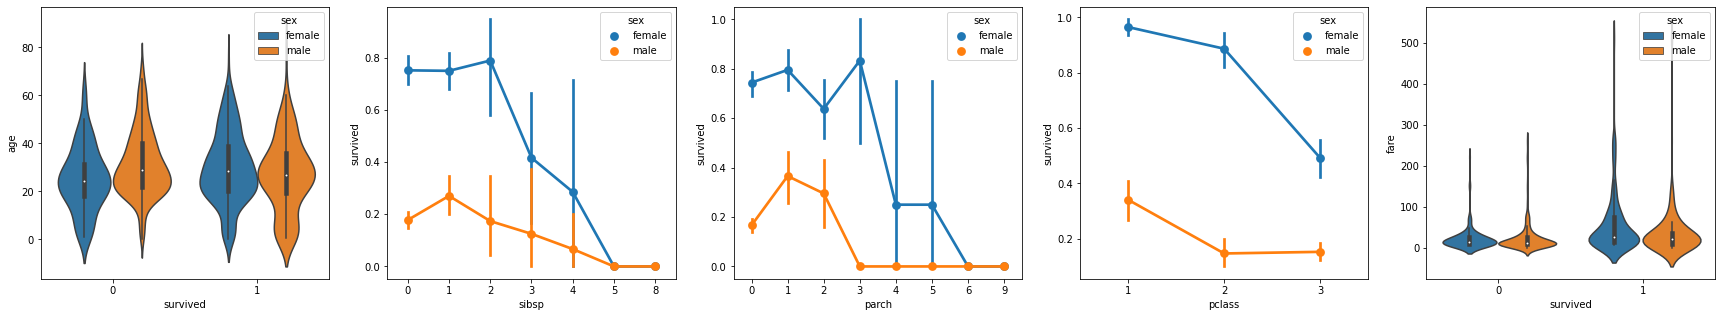

In [29]:
#data.dtypes - Permite ver os tipos de cada coluna no DataFrame

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])
